### 01 — Exploratory Data Analysis (MovieLens 20M)

Goals:
- Inspect raw files (`ratings.csv`, `movies.csv`, `tags.csv`).
- Verify schema, types, missing values.
- Understand user/item counts, rating distribution, sparsity.
- Explore genres, top movies, most active users, and time trends.
- Save summary tables and figures into `reports/figures/`.

In [46]:
import os, sys, math
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
BASE = Path.cwd().parent
sys.path.append(str(BASE / 'src'))
from data_loader import (
    load_ratings, load_movies, load_tags
)

# Define paths
RAW  = BASE / 'data' / 'raw'
FIGS = BASE / 'reports' / 'figures'
FIGS.mkdir(parents=True, exist_ok=True)

# Define data file paths
ratings_path = RAW / 'ratings.csv'
movies_path  = RAW / 'movies.csv'
tags_path    = RAW / 'tags.csv'

# Check existence of data files
print('RAW exists:', RAW.exists())
print('ratings.csv:', ratings_path.exists(), 'movies.csv:', movies_path.exists(), 'tags.csv:', tags_path.exists())
assert ratings_path.exists() and movies_path.exists(), "Please copy ratings.csv and movies.csv into data/raw/"


RAW exists: True
ratings.csv: True movies.csv: True tags.csv: True


In [48]:
# Read CSVs with appropriate dtypes
ratings = load_ratings(str(ratings_path))
movies = load_movies(str(movies_path))
tags = load_tags(str(tags_path))

print(ratings.shape, movies.shape, tags.shape)
ratings.head()


2025-10-18 00:36:22,865 | INFO | data_loader | Loading ratings from /Users/alanyu/Documents/IIT/ITM/ITMD-524-Applied AI and Deep Learning/finalproject/MovieLens-MCRS/data/raw/ratings.csv
2025-10-18 00:36:22,897 | INFO | data_loader | Loading movies from /Users/alanyu/Documents/IIT/ITM/ITMD-524-Applied AI and Deep Learning/finalproject/MovieLens-MCRS/data/raw/movies.csv
2025-10-18 00:36:22,904 | INFO | data_loader | Loading tags from /Users/alanyu/Documents/IIT/ITM/ITMD-524-Applied AI and Deep Learning/finalproject/MovieLens-MCRS/data/raw/tags.csv


(100836, 5) (9742, 3) (3683, 5)


userId  movieId  rating  timestamp            datetime
0       1        1     4.0  964982703 2000-07-30 18:45:03
1       1        3     4.0  964981247 2000-07-30 18:20:47
2       1        6     4.0  964982224 2000-07-30 18:37:04
3       1       47     5.0  964983815 2000-07-30 19:03:35
4       1       50     5.0  964982931 2000-07-30 18:48:51

### Basic Info & Missing Values

In [24]:
# Basic Info & Missing Values
display(ratings.info())
display(movies.info())
display(tags.info())

# Missing value proportions
ratings_na = ratings.isna().mean().sort_values(ascending=False)
movies_na = movies.isna().mean().sort_values(ascending=False)
tags_na = tags.isna().mean().sort_values(ascending=False)

# Display missing value proportions
display(ratings_na.head(10), movies_na.head(10), tags_na.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype        
---  ------     --------------   -----        
 0   userId     100836 non-null  int32        
 1   movieId    100836 non-null  int32        
 2   rating     100836 non-null  float32      
 3   timestamp  100836 non-null  int64        
 4   datetime   100836 non-null  datetime64[s]
dtypes: datetime64[s](1), float32(1), int32(2), int64(1)
memory usage: 2.7 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int32 
 1   title    9742 non-null   string
 2   genres   9742 non-null   string
dtypes: int32(1), string(2)
memory usage: 190.4 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int32 
 1   movieId    3683 non-null   int32 
 2   tag        3683 non-null   string
 3   timestamp  3683 non-null   Int64 
dtypes: Int64(1), int32(2), string(1)
memory usage: 90.0 KB


None

userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
datetime     0.0
dtype: float64

movieId    0.0
title      0.0
genres     0.0
dtype: float64

userId       0.0
movieId      0.0
tag          0.0
timestamp    0.0
dtype: float64

### Users, Movies, Interactions, Sparsity

In [ ]:
# Calculate sparsity
n_users = ratings['userId'].nunique()
n_items = ratings['movieId'].nunique()
n_inter = len(ratings)
sparsity = 1 - (n_inter / (n_users * n_items))
summary = pd.DataFrame({
    'n_users':[n_users], 'n_movies':[n_items], 'n_ratings':[n_inter], 'sparsity':[sparsity]
})
summary


n_users  n_movies  n_ratings  sparsity
0      610      9724     100836     0.983

### Rating Distribution

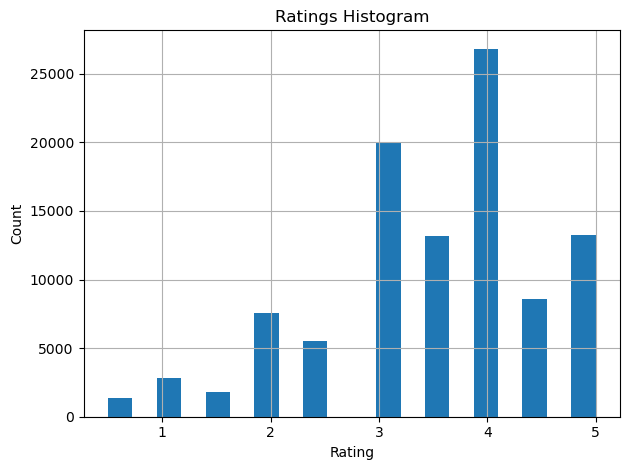

In [ ]:
# Ratings Histogram
plt.figure()
ratings['rating'].hist(bins=20)
plt.title('Ratings Histogram')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(FIGS / 'ratings_histogram.png')
plt.show()


### Top Movies by Number of Ratings

In [ ]:
# Top 20 Most Rated Movies
movie_counts = ratings.groupby('movieId')['userId'].count().sort_values(ascending=False).head(20)
top_movies = movies.set_index('movieId').loc[movie_counts.index][['title']].copy()
top_movies['n_ratings'] = movie_counts.values
top_movies.reset_index(inplace=True)
top_movies


movieId                                              title  n_ratings
0       356                                Forrest Gump (1994)        329
1       318                   Shawshank Redemption, The (1994)        317
2       296                                Pulp Fiction (1994)        307
3       593                   Silence of the Lambs, The (1991)        279
4      2571                                 Matrix, The (1999)        278
5       260          Star Wars: Episode IV - A New Hope (1977)        251
6       480                               Jurassic Park (1993)        238
7       110                                  Braveheart (1995)        237
8       589                  Terminator 2: Judgment Day (1991)        224
9       527                            Schindler's List (1993)        220
10     2959                                  Fight Club (1999)        218
11        1                                   Toy Story (1995)        215
12     1196  Star Wars: Episode V - The Empire Strikes Back...        211
13       50                         Usual Suspects, The (1995)        204
14     2858                             American Beauty (1999)        204
15       47                        Seven (a.k.a. Se7en) (1995)        203
16      780               Independence Day (a.k.a. ID4) (1996)        202
17      150                                   Apollo 13 (1995)        201
18     1198  Raiders of the Lost Ark (Indiana Jones and the...        200
19     4993  Lord of the Rings: The Fellowship of the Ring,...        198

### Most Active Users

In [30]:
active_users = ratings['userId'].value_counts().reset_index(name='n_ratings').head(20)
active_users


userId  n_ratings
0      414       2698
1      599       2478
2      474       2108
3      448       1864
4      274       1346
5      610       1302
6       68       1260
7      380       1218
8      606       1115
9      288       1055
10     249       1046
11     387       1027
12     182        977
13     307        975
14     603        943
15     298        939
16     177        904
17     318        879
18     232        862
19     480        836

### Temporal Trends (Monthly Ratings Count)

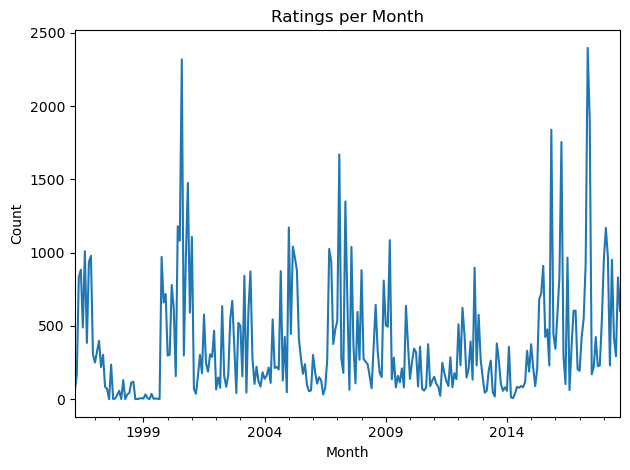

In [ ]:
if 'datetime' in ratings.columns:
    # Monthly Ratings Count(Month Start)
    monthly = ratings.set_index('datetime').resample('MS')['rating'].count()
    plt.figure()
    monthly.plot()
    plt.title('Ratings per Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(FIGS / 'ratings_per_month.png')
    plt.show()
else:
    print("No datetime column parsed; skip temporal plot.")


### Genres: frequency and average ratings

In [41]:
# Explode pipe-separated genres
g = movies[['movieId','genres']].copy()
g['genres'] = g['genres'].fillna('')
g = g.assign(genre=g['genres'].str.split('|')).explode('genre')
g = g[g['genre'].notna() & (g['genre']!='(no genres listed)') & (g['genre']!='')]

# join with ratings to compute counts and mean rating per genre
gr = ratings.merge(g[['movieId','genre']], on='movieId', how='left')
genre_stats = gr.groupby('genre')['rating'].agg(['count','mean']).sort_values('count', ascending=False)
genre_stats.head(20)

count      mean
genre                       
Drama        41928  3.656184
Comedy       39053  3.384721
Action       30635  3.447984
Thriller     26452  3.493706
Adventure    24161  3.508609
Romance      18124  3.506511
Sci-Fi       17243  3.455721
Crime        16681  3.658294
Fantasy      11834  3.491000
Children      9208  3.412956
Mystery       7674  3.632460
Horror        7291  3.258195
Animation     6988  3.629937
War           4859  3.808294
IMAX          4145  3.618335
Musical       4138  3.563678
Western       1930  3.583938
Documentary   1219  3.797785
Film-Noir      870  3.920115

### Save key tables

In [ ]:
# Save key tables
summary.to_csv(BASE / 'reports' / 'eda_summary.csv', index=False)
top_movies.to_csv(BASE / 'reports' / 'top_movies.csv', index=False)
active_users.to_csv(BASE / 'reports' / 'active_users.csv', index=False)
genre_stats.to_csv(BASE / 'reports' / 'genre_stats.csv')
print('Saved tables to', BASE / 'reports')


Saved tables to /Users/alanyu/Documents/IIT/ITM/ITMD-524-Applied AI and Deep Learning/finalproject/MovieLens-MCRS/reports
